In [20]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
%matplotlib inline

In [21]:
url = ("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
names = ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
dataset = pd.read_csv(url, skiprows=[0], names=names)
dataset = dataset.dropna()

In [22]:
data = dataset[['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]

In [23]:
print(dataset.shape)

(333, 7)


In [24]:
print(dataset.head(20))

   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0   Adelie  Torgersen            39.1           18.7              181.0   
1   Adelie  Torgersen            39.5           17.4              186.0   
2   Adelie  Torgersen            40.3           18.0              195.0   
4   Adelie  Torgersen            36.7           19.3              193.0   
5   Adelie  Torgersen            39.3           20.6              190.0   
6   Adelie  Torgersen            38.9           17.8              181.0   
7   Adelie  Torgersen            39.2           19.6              195.0   
12  Adelie  Torgersen            41.1           17.6              182.0   
13  Adelie  Torgersen            38.6           21.2              191.0   
14  Adelie  Torgersen            34.6           21.1              198.0   
15  Adelie  Torgersen            36.6           17.8              185.0   
16  Adelie  Torgersen            38.7           19.0              195.0   
17  Adelie  Torgersen    

In [28]:
# Exclude the 'cost' column
data_excluded = data.drop(columns=['species', 'island', 'sex'])
print(data_excluded)

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0              39.1           18.7              181.0       3750.0
1              39.5           17.4              186.0       3800.0
2              40.3           18.0              195.0       3250.0
4              36.7           19.3              193.0       3450.0
5              39.3           20.6              190.0       3650.0
..              ...            ...                ...          ...
338            47.2           13.7              214.0       4925.0
340            46.8           14.3              215.0       4850.0
341            50.4           15.7              222.0       5750.0
342            45.2           14.8              212.0       5200.0
343            49.9           16.1              213.0       5400.0

[333 rows x 4 columns]


In [29]:
#Normalisasi Data dengan Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler
x = data_excluded.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [2:5]

array([[0.29818182, 0.58333333, 0.38983051, 0.15277778],
       [0.16727273, 0.73809524, 0.3559322 , 0.20833333],
       [0.26181818, 0.89285714, 0.30508475, 0.26388889]])

In [30]:
#Menghitung Jarak Euclidean dan Hierarki Klustering dengan SciPy

import numpy as np
from scipy.spatial.distance import euclidean

leng = feature_mtx.shape[0]
D = np.zeros((leng, leng))  # Use numpy's zeros for initialization

for i in range(leng):
    for j in range(leng):
        D[i, j] = euclidean(feature_mtx[i], feature_mtx[j])  # Use scipy's euclidean function

import pylab
import scipy.cluster.hierarchy

In [31]:
#Konstruksi Dendrogram dengan Metode Single Linkage
X = hierarchy.linkage(D, 'single')

<ipython-input-31-ca1cbd958402>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(D, 'single')


In [8]:
X, Y = make_blobs(n_samples = 50, centers=[[4,4], [-2, -1], [1,1]], cluster_std=1.0)

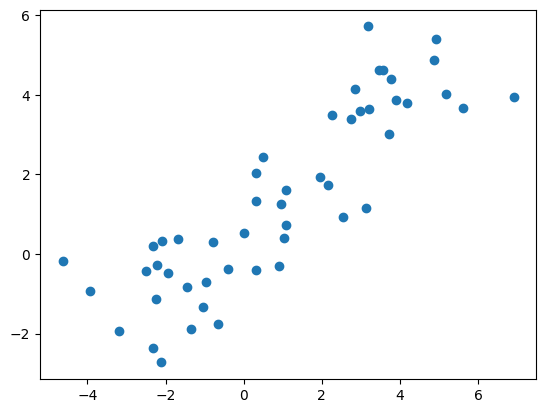

In [9]:
plt.scatter(X[:, 0], X[:, 1], marker='o')

In [13]:
agglomsingle = AgglomerativeClustering(n_clusters= 3, linkage = 'single')

In [14]:
agglomsingle.fit(X,Y)

AgglomerativeClustering(linkage='single', n_clusters=3)